In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.5 MB/s 
     |████████████████████████████████| 596 kB 40.4 MB/s 
     |████████████████████████████████| 6.6 MB 36.2 MB/s 
     |████████████████████████████████| 880 kB 42.1 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=eff6568e82c91f442b775f00255eeb9d3536a27ff8cf6931e60f4083f7d3a604
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install torch==1.10.2

     |██████████████████████████████▎ | 834.1 MB 43.2 MB/s eta 0:00:02tcmalloc: large alloc 1147494400 bytes == 0x3a670000 @  0x7fd48fe62615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 1.9 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.12.0+cu113 requires torch==1.11.0, but you have torch 1.10.2 which is incompatible.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.10.2 which is incompatible.
torchaudio 0.11.0+c

In [ ]:
!pip install opencv-python==4.4.0.46

     |████████████████████████████████| 49.5 MB 199 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pickle
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import os, sys
from os import listdir

In [ ]:
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN
!pip install -q ninja

import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

Cloning into 'ACGPN'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 161 (delta 61), reused 84 (delta 17), pack-reused 0
Receiving objects: 100% (161/161), 303.18 KiB | 2.86 MiB/s, done.
Resolving deltas: 100% (61/61), done.
/content/ACGPN
     |████████████████████████████████| 108 kB 4.8 MB/s 


### Downloading Models

In [ ]:
# downloading models
def download_drive(id, name):
    """
    id : file id in the drive
    name : Name you want to save
    """
    os.system(f"sudo wget --load-cookies /tmp/cookies.txt 'https://docs.google.com/uc?export=download&confirm=t&id={id}' -O {name} && rm -rf /tmp/cookies.txt")
download_drive("1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko",'pose_iter_440000.caffemodel')
%cd pose
%cd ..
!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
download_drive("1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH",output)
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..
!mkdir checkpoints
download_drive("1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx",'checkpoints/ACGPN_checkpoints.zip')
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

/content/ACGPN/pose
/content/ACGPN
Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 769, done.
remote: Total 769 (delta 0), reused 0 (delta 0), pack-reused 769
Receiving objects: 100% (769/769), 3.81 MiB | 10.53 MiB/s, done.
Resolving deltas: 100% (175/175), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 822, done.
remote: Total 822 (delta 0), reused 0 (delta 0), pack-reused 822
Receiving objects: 100% (822/822), 30.72 MiB | 20.23 MiB/s, done.
Resolving deltas: 100% (379/379), done.
/content/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M

In [ ]:
with open('/content/drive/MyDrive/data.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [ ]:
from IPython.display import Audio
from scipy.io import wavfile
import numpy as np

In [ ]:
!pip install pydub

## Converting Audio to Text

In [ ]:
import librosa as lb

file_name = "/content/drive/MyDrive/blackdress (1).wav"

from pydub import AudioSegment

# files                                                                       
# m4a_file = file_name
# wav_filename = r"F:\20211210_151013.wav"
# from pydub import AudioSegment
# track = AudioSegment.from_file(m4a_file,  format= 'm4a')
# file_handle = track.export(wav_filename, format='wav')
waveform, rate = lb.load(file_name, sr = 16000)
framerate = rate
sounddata = waveform

time = len(sounddata)/framerate

print(framerate,'Hz')
print(time,'s')

16000 Hz
2.677875 s


In [ ]:
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

In [ ]:
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.


Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Function to generate the transcription

In [ ]:
def get_transcription(input):
  input_audio, rate = lb.load(input, sr = 16000)
  input_values = tokenizer(input_audio, return_tensors ="pt").input_values
  logits = model(input_values).logits
  predicted_ids = torch.argmax(logits, dim = -1)
  transcription = tokenizer.batch_decode(predicted_ids)[0]

  return transcription

In [ ]:
get_transcription(file_name)

'I WANT A BLACK DRESS'

In [ ]:
test_trans = get_transcription(file_name)

### Printing the transcription

In [ ]:
test_trans

'I WANT A BLACK DRESS'

## Finding best image cloth

In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/577M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/568 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/842k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/512k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
from google.colab import files
main_dir = "/content/drive/MyDrive/ACGPN_train_data"
files = listdir(main_dir)
# you can change file extension below to read other image types
images_list = [i for i in files if i.endswith('.jpg')] 

### Getting Text Embeds

In [ ]:
# getting text embeds
text = 'I need a red sweater'
img = Image.open(main_dir+"/" + images_list[0]) #/content/drive/MyDrive/ACGPN_train_data/007000_1 - Copy.jpg
inputs = processor(text = test_trans, images=img, return_tensors="pt", padding=True)
outputs = model(**inputs)
text_emb = outputs.text_embeds
text_emb = text_emb.detach().numpy()

### Finding Path of Most Similar Cloth

In [ ]:
# Finding best image path (clothes)
max = 0
best_image_path = None
for (path, emb) in data.items():
  curr = cosine_similarity(text_emb.reshape(1,-1), emb.reshape(1,-1))
  if curr > max:
    max = curr
    best_image_path = path


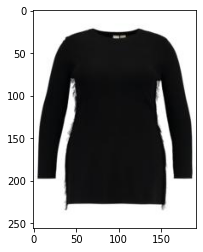

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread(main_dir + '/' + best_image_path)
plt.imshow(img)


## CV part

In [ ]:
sorted(os.listdir('inputs/cloth'))
cloth_name = '000001_1.png'
cloth_path = main_dir + '/' + best_image_path
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge') #generating mask for sweater

Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png


### Finding Person Path

In [ ]:
# selecting person path
import time
sorted(os.listdir('inputs/img'))
!cp /content/ACGPN/pose_iter_440000.caffemodel /content/ACGPN/pose/pose_iter_440000.caffemodel
start_time = time.time()
img_name = '000001_0.png'
img_path = '/content/drive/MyDrive/ACGPN_person/person3.jpg'
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

### Generating Keypoints

In [ ]:
# generate keypoints
img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json')) #generate keypoints
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

Resized image in 0.36014676094055176s
100% 1/1 [00:00<00:00,  2.59it/s]
Parsing generated in 84.3371262550354s
File saved at Data_preprocessing/test_pose/000001_0_keypoints.json
Pose map generated in 10.201007604598999s


## Showing Final Result

In [ ]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

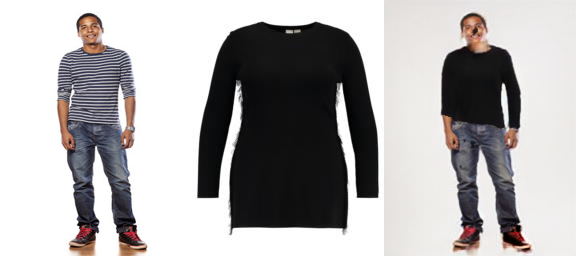

In [ ]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid